# **Edge Detection Tools**

# **Libraries**

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from PIL import Image
import colorsys


# **Look Up Table**

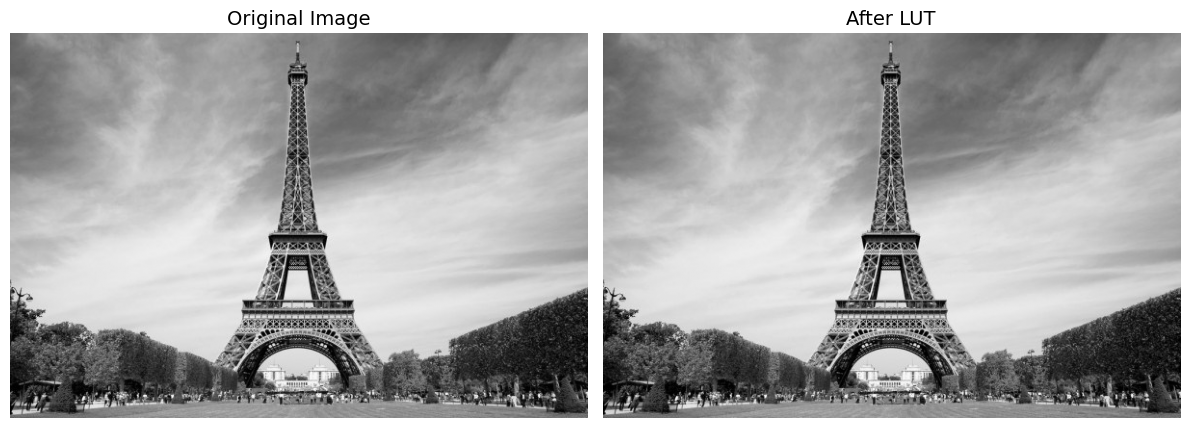

LUT mapping (first 10 values):
Input: 0 -> Output: 0
Input: 1 -> Output: 0
Input: 2 -> Output: 1
Input: 3 -> Output: 1
Input: 4 -> Output: 2
Input: 5 -> Output: 3
Input: 6 -> Output: 4
Input: 7 -> Output: 5
Input: 8 -> Output: 6
Input: 9 -> Output: 7


In [6]:
width, height = 256, 256
img_array = np.tile(np.arange(256, dtype=np.uint8), (height, 1))
original_image = Image.fromarray(img_array)

original_image = Image.open('./img/eyfel.jpg')
original_image = original_image.convert('L')  # Convert to grayscale

img_array = np.array(original_image)

#Define Lut
lut = np.array([0, 0, 1, 1, 2, 3, 4, 5] + list(range(6, 256)), dtype=np.uint8)

lut_image_array = lut[img_array]
lut_image = Image.fromarray(lut_image_array)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')


axes[1].imshow(lut_image, cmap='gray')
axes[1].set_title('After LUT', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("LUT mapping (first 10 values):")
for i in range(10):
    print(f"Input: {i} -> Output: {lut[i]}")


# **Operation of a 3-bit look-up table** 

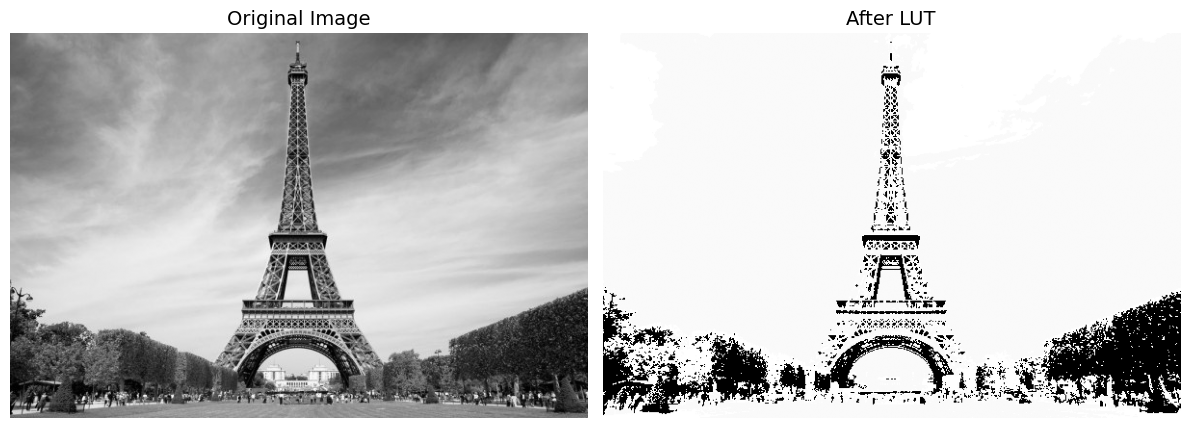

3-bit LUT mapping:
Input (3-bit) -> Output
000 (0) -> 0
001 (1) -> 0
010 (2) -> 1
011 (3) -> 1
100 (4) -> 2
101 (5) -> 3
110 (6) -> 4
111 (7) -> 5


In [9]:


width, height = 256, 256
img_array = np.tile(np.arange(256, dtype=np.uint8), (height, 1))
original_image = Image.fromarray(img_array)

original_image = Image.open('./img/eyfel.jpg')
original_image = original_image.convert('L')  # Convert to grayscale 

img_array = np.array(original_image)

# Define 3-bit LUT 
lut_3bit = np.array([0, 0, 1, 1, 2, 3, 4, 5], dtype=np.uint8)

indices = img_array >> 5  #

lut_output = lut_3bit[indices]

lut_image_array = (lut_output * 255) // 5  
lut_image = Image.fromarray(lut_image_array)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

axes[1].imshow(lut_image, cmap='gray')
axes[1].set_title('After LUT', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("3-bit LUT mapping:")
print("Input (3-bit) -> Output")
for i in range(8):
    print(f"{i:03b} ({i}) -> {lut_3bit[i]}")
    


# **Histogram**
**The pixel intensities are plotted along the x-axis and the number of occurrences for each intensity are plotted along the y-axis**

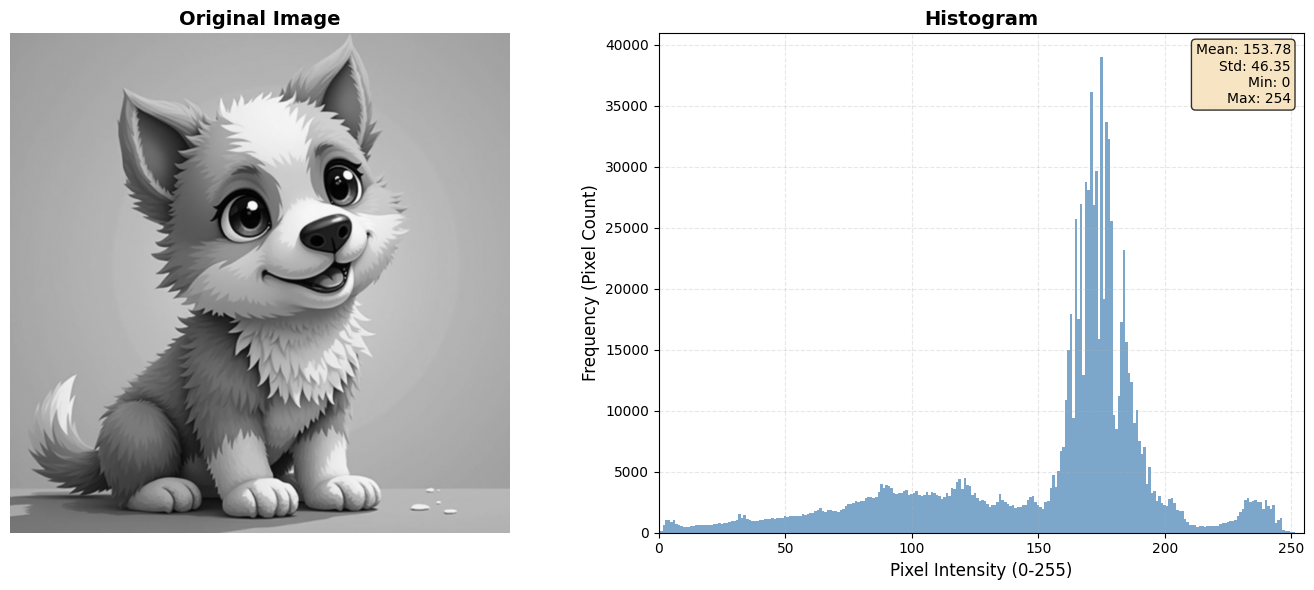

Image shape: (1024, 1024)
Total pixels: 1048576

Pixel intensity distribution:
Mean intensity: 153.78
Standard deviation: 46.35
Min intensity: 0
Max intensity: 254


In [11]:


image_path = './img/300dog (1).jpeg' 
original_image = Image.open(image_path)


if original_image.mode != 'L':
    original_image = original_image.convert('L')


img_array = np.array(original_image)

hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].bar(range(256), hist, width=1.0, color='steelblue', alpha=0.7)
axes[1].set_title('Histogram', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pixel Intensity (0-255)', fontsize=12)
axes[1].set_ylabel('Frequency (Pixel Count)', fontsize=12)
axes[1].set_xlim([0, 255])
axes[1].grid(True, alpha=0.3, linestyle='--')

stats_text = f'Mean: {np.mean(img_array):.2f}\n'
stats_text += f'Std: {np.std(img_array):.2f}\n'
stats_text += f'Min: {np.min(img_array)}\n'
stats_text += f'Max: {np.max(img_array)}'
axes[1].text(0.98, 0.98, stats_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Image shape: {img_array.shape}")
print(f"Total pixels: {img_array.size}")
print(f"\nPixel intensity distribution:")
print(f"Mean intensity: {np.mean(img_array):.2f}")
print(f"Standard deviation: {np.std(img_array):.2f}")
print(f"Min intensity: {np.min(img_array)}")
print(f"Max intensity: {np.max(img_array)}")

# **Histogram experiments**
**HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)**

PART 1: HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)


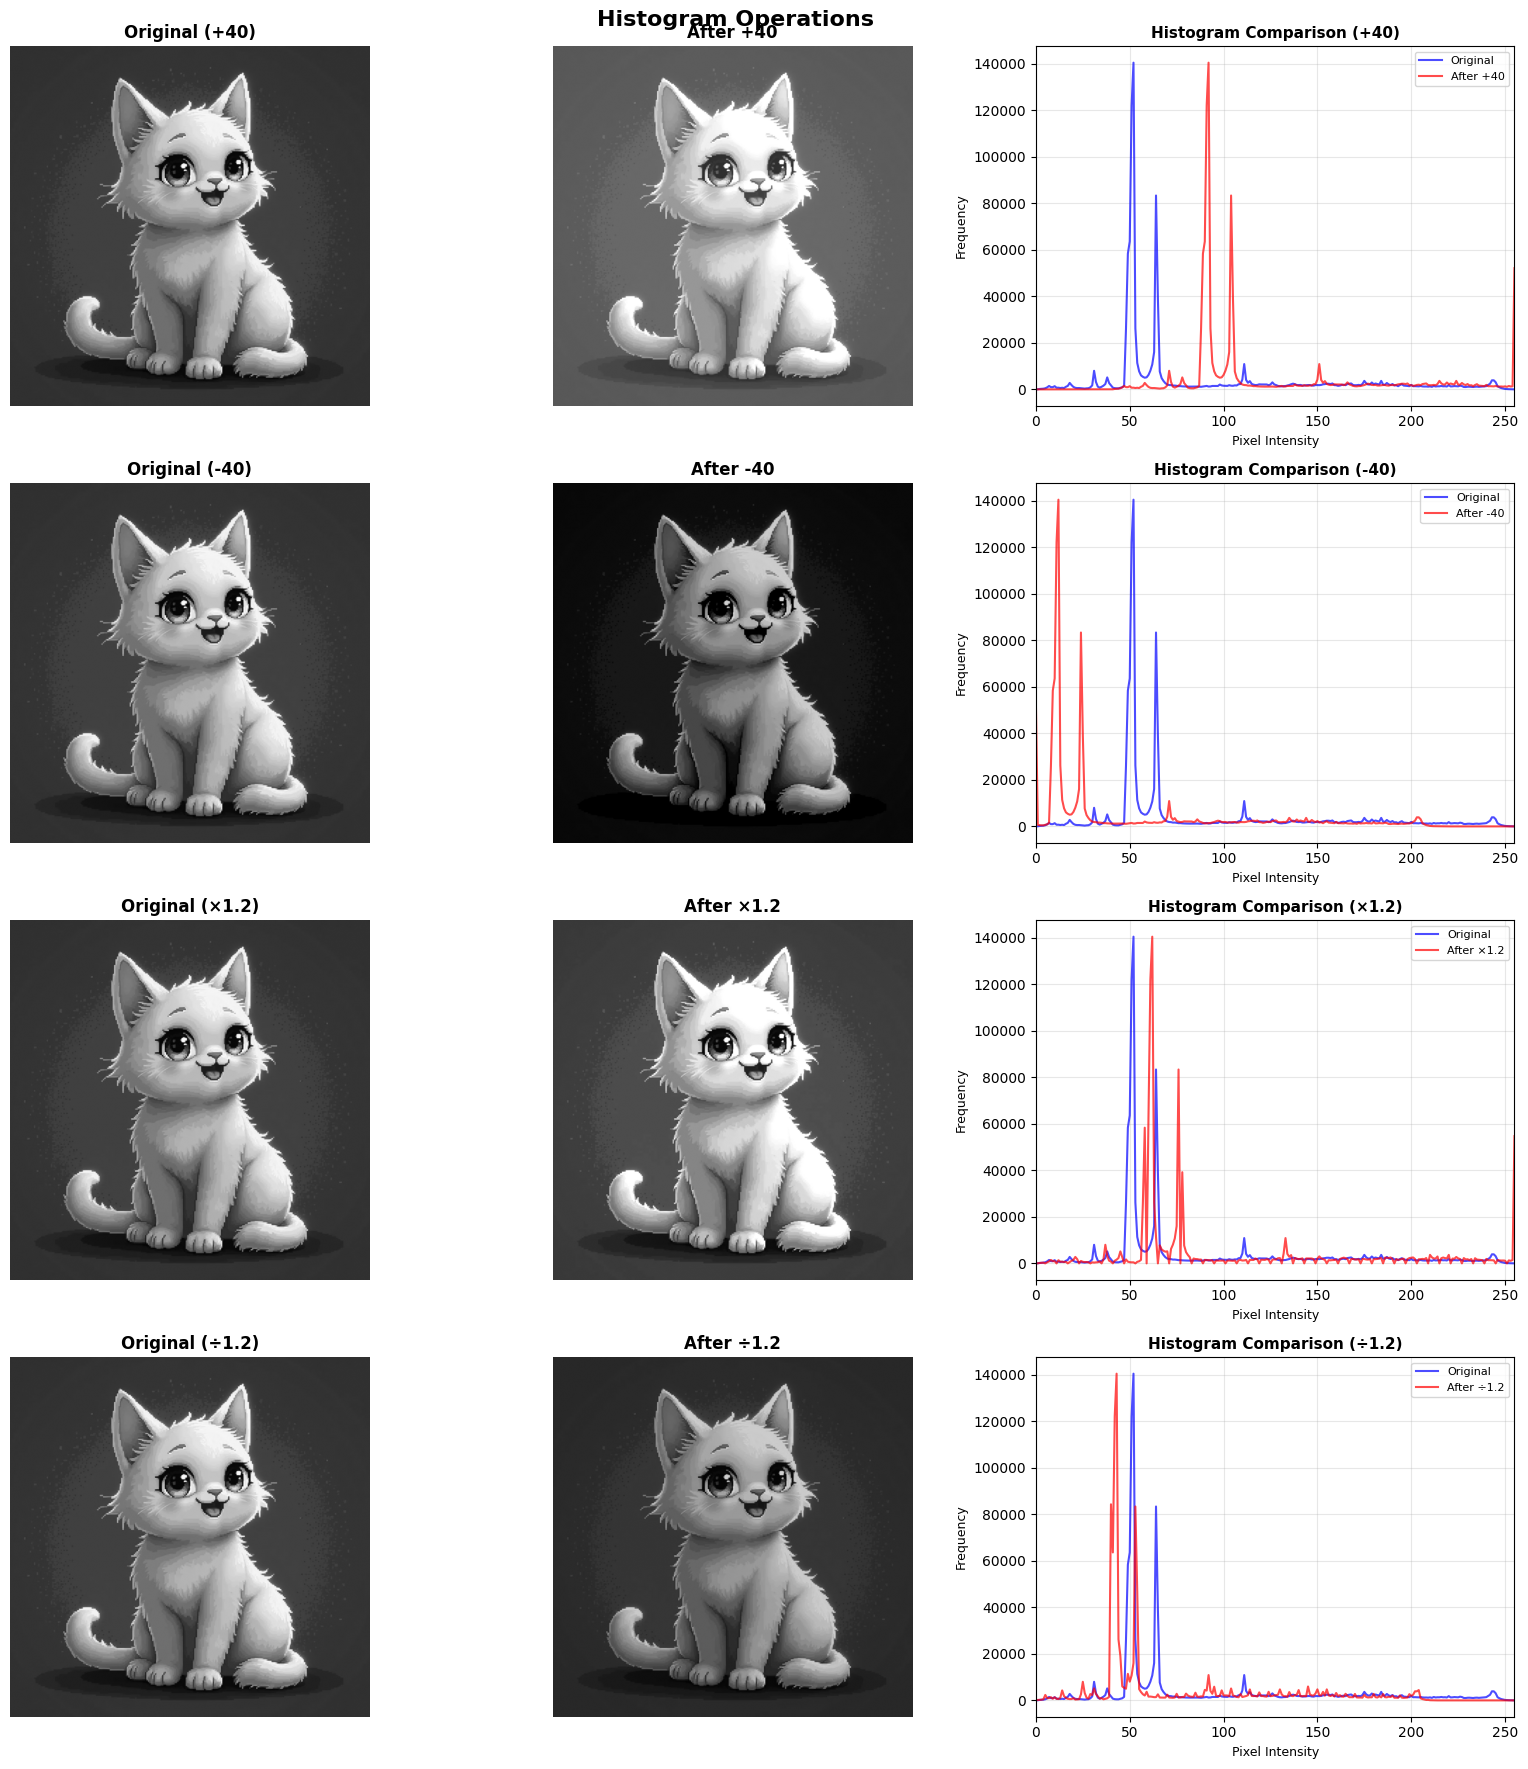


PART 2: RGB vs GRAYSCALE COMPARISON


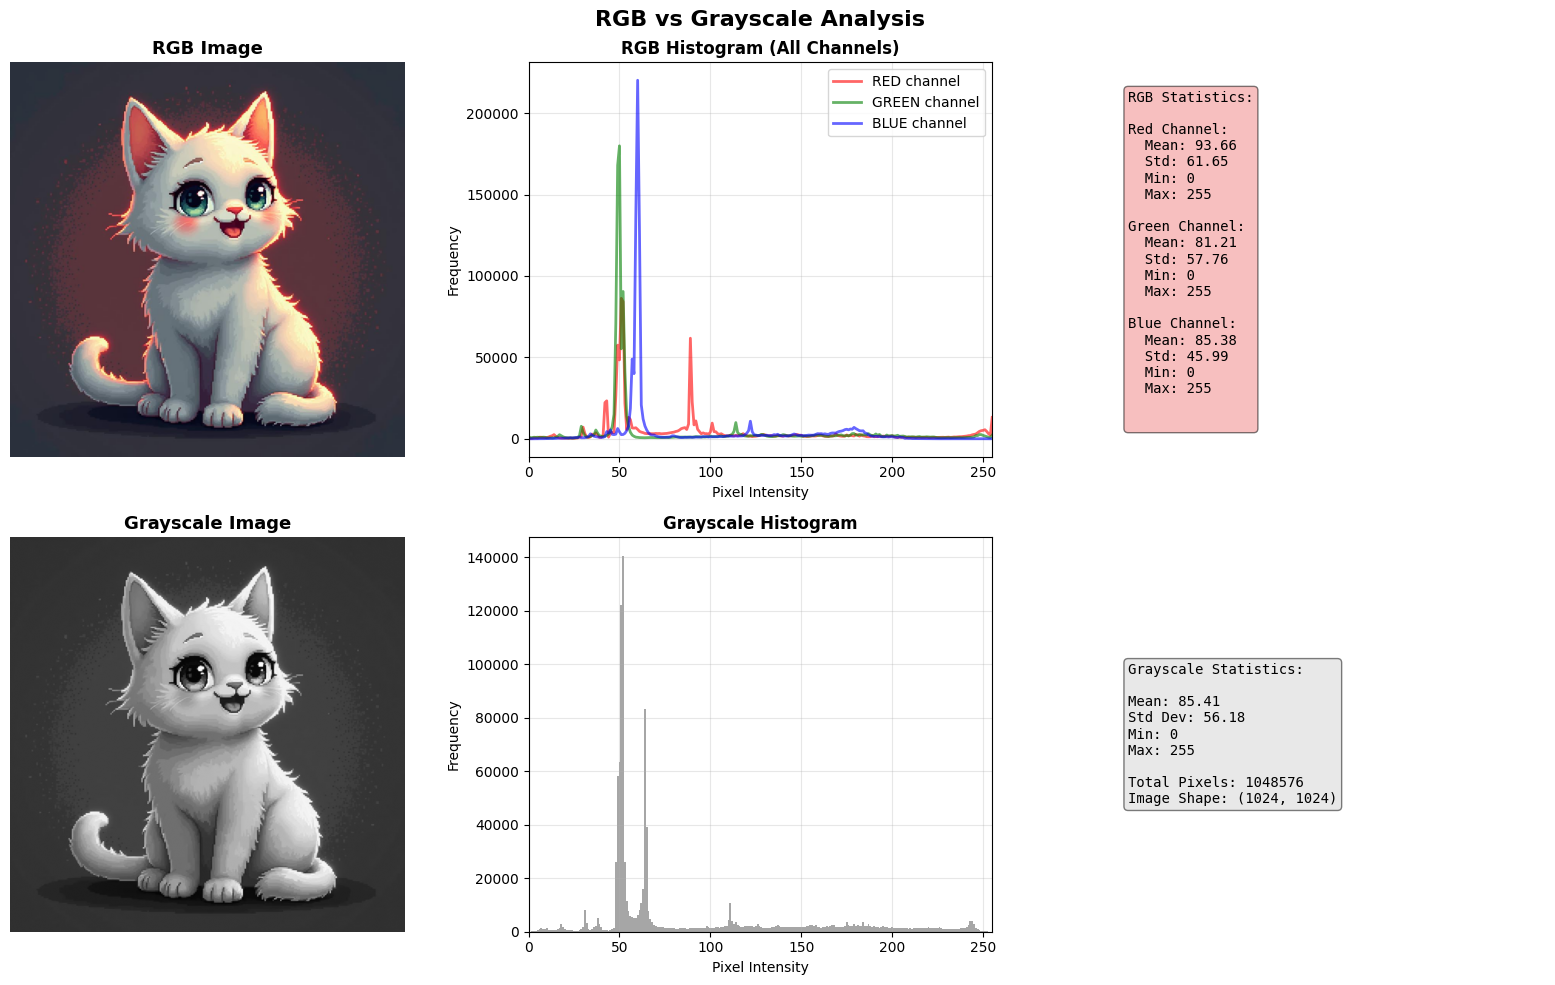


Completed!


In [15]:

image_path = './img/300cat (1).jpeg' 
original_image = Image.open(image_path)

# Convert to grayscale
if original_image.mode != 'L':
    gray_image = original_image.convert('L')
else:
    gray_image = original_image

img_array = np.array(gray_image, dtype=np.float32)

print("=" * 60)
print("PART 1: HISTOGRAM OPERATIONS (+40, -40, ×1.2, ÷1.2)")
print("=" * 60)

img_plus40 = np.clip(img_array + 40, 0, 255).astype(np.uint8)
img_minus40 = np.clip(img_array - 40, 0, 255).astype(np.uint8)
img_mult12 = np.clip(img_array * 1.2, 0, 255).astype(np.uint8)
img_div12 = np.clip(img_array / 1.2, 0, 255).astype(np.uint8)


fig, axes = plt.subplots(4, 3, figsize=(16, 18))
fig.suptitle('Histogram Operations', fontsize=16, fontweight='bold')

operations = [
    (img_array.astype(np.uint8), img_plus40, '+40', 'Original', 'After +40'),
    (img_array.astype(np.uint8), img_minus40, '-40', 'Original', 'After -40'),
    (img_array.astype(np.uint8), img_mult12, '×1.2', 'Original', 'After ×1.2'),
    (img_array.astype(np.uint8), img_div12, '÷1.2', 'Original', 'After ÷1.2')
]

for i, (orig, processed, op_name, orig_title, proc_title) in enumerate(operations):

    axes[i, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)
    axes[i, 0].set_title(f'{orig_title} ({op_name})', fontsize=12, fontweight='bold')
    axes[i, 0].axis('off')
    
 
    axes[i, 1].imshow(processed, cmap='gray', vmin=0, vmax=255)
    axes[i, 1].set_title(proc_title, fontsize=12, fontweight='bold')
    axes[i, 1].axis('off')
    

    hist_orig = np.histogram(orig.flatten(), bins=256, range=(0, 256))[0]
    hist_proc = np.histogram(processed.flatten(), bins=256, range=(0, 256))[0]
    
    axes[i, 2].plot(range(256), hist_orig, color='blue', alpha=0.7, linewidth=1.5, label='Original')
    axes[i, 2].plot(range(256), hist_proc, color='red', alpha=0.7, linewidth=1.5, label=proc_title)
    axes[i, 2].set_title(f'Histogram Comparison ({op_name})', fontsize=11, fontweight='bold')
    axes[i, 2].set_xlabel('Pixel Intensity', fontsize=9)
    axes[i, 2].set_ylabel('Frequency', fontsize=9)
    axes[i, 2].set_xlim([0, 255])
    axes[i, 2].legend(fontsize=8)
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("PART 2: RGB vs GRAYSCALE COMPARISON")
print("=" * 60)

rgb_image = Image.open(image_path)
if rgb_image.mode != 'RGB':
    rgb_image = rgb_image.convert('RGB')

rgb_array = np.array(rgb_image)
gray_array = np.array(gray_image)

fig2, axes2 = plt.subplots(2, 3, figsize=(16, 10))
fig2.suptitle('RGB vs Grayscale Analysis', fontsize=16, fontweight='bold')


axes2[0, 0].imshow(rgb_image)
axes2[0, 0].set_title('RGB Image', fontsize=13, fontweight='bold')
axes2[0, 0].axis('off')

axes2[1, 0].imshow(gray_image, cmap='gray')
axes2[1, 0].set_title('Grayscale Image', fontsize=13, fontweight='bold')
axes2[1, 0].axis('off')

colors = ('red', 'green', 'blue')
for idx, color in enumerate(colors):
    hist = np.histogram(rgb_array[:, :, idx].flatten(), bins=256, range=(0, 256))[0]
    axes2[0, 1].plot(range(256), hist, color=color, alpha=0.6, linewidth=2, label=f'{color.upper()} channel')

axes2[0, 1].set_title('RGB Histogram (All Channels)', fontsize=12, fontweight='bold')
axes2[0, 1].set_xlabel('Pixel Intensity', fontsize=10)
axes2[0, 1].set_ylabel('Frequency', fontsize=10)
axes2[0, 1].set_xlim([0, 255])
axes2[0, 1].legend()
axes2[0, 1].grid(True, alpha=0.3)

hist_gray = np.histogram(gray_array.flatten(), bins=256, range=(0, 256))[0]
axes2[1, 1].bar(range(256), hist_gray, width=1.0, color='gray', alpha=0.7)
axes2[1, 1].set_title('Grayscale Histogram', fontsize=12, fontweight='bold')
axes2[1, 1].set_xlabel('Pixel Intensity', fontsize=10)
axes2[1, 1].set_ylabel('Frequency', fontsize=10)
axes2[1, 1].set_xlim([0, 255])
axes2[1, 1].grid(True, alpha=0.3)


axes2[0, 2].axis('off')
rgb_stats = "RGB Statistics:\n\n"
for idx, color in enumerate(['Red', 'Green', 'Blue']):
    channel_data = rgb_array[:, :, idx]
    rgb_stats += f"{color} Channel:\n"
    rgb_stats += f"  Mean: {np.mean(channel_data):.2f}\n"
    rgb_stats += f"  Std: {np.std(channel_data):.2f}\n"
    rgb_stats += f"  Min: {np.min(channel_data)}\n"
    rgb_stats += f"  Max: {np.max(channel_data)}\n\n"

axes2[0, 2].text(0.1, 0.5, rgb_stats, fontsize=10, family='monospace',
                 verticalalignment='center', 
                 bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))


axes2[1, 2].axis('off')
gray_stats = "Grayscale Statistics:\n\n"
gray_stats += f"Mean: {np.mean(gray_array):.2f}\n"
gray_stats += f"Std Dev: {np.std(gray_array):.2f}\n"
gray_stats += f"Min: {np.min(gray_array)}\n"
gray_stats += f"Max: {np.max(gray_array)}\n\n"
gray_stats += f"Total Pixels: {gray_array.size}\n"
gray_stats += f"Image Shape: {gray_array.shape}"

axes2[1, 2].text(0.1, 0.5, gray_stats, fontsize=10, family='monospace',
                 verticalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nCompleted!")

# **Histogram Equalization**
**[Method1]
Step 1: Compute histogram**

**Step 2 : Calculate normalized sum of histogram
Factor-based (7/16 ≈ 0.4375)** 

**Step 3: Transform input image to output image
Image transform using LUT**

STEP 1: COMPUTE HISTOGRAM
Total pixels: 240000
Histogram computed for 256 intensity levels
Sample histogram values: [ 38 133 151 130 216 208 201 217 199 247]

STEP 2: HISTOGRAM EQUALIZATION WITH FACTOR 7/16
Normalization factor: 7/16 = 0.4375
CDF calculated and normalized
Equalized image created
Equalized range: [0, 111]

STEP 3: IMAGE TRANSFORM USING LUT
LUT Mapping applied:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 5
  5 → 7
  6+ → sequential
Final output range: [0, 111]


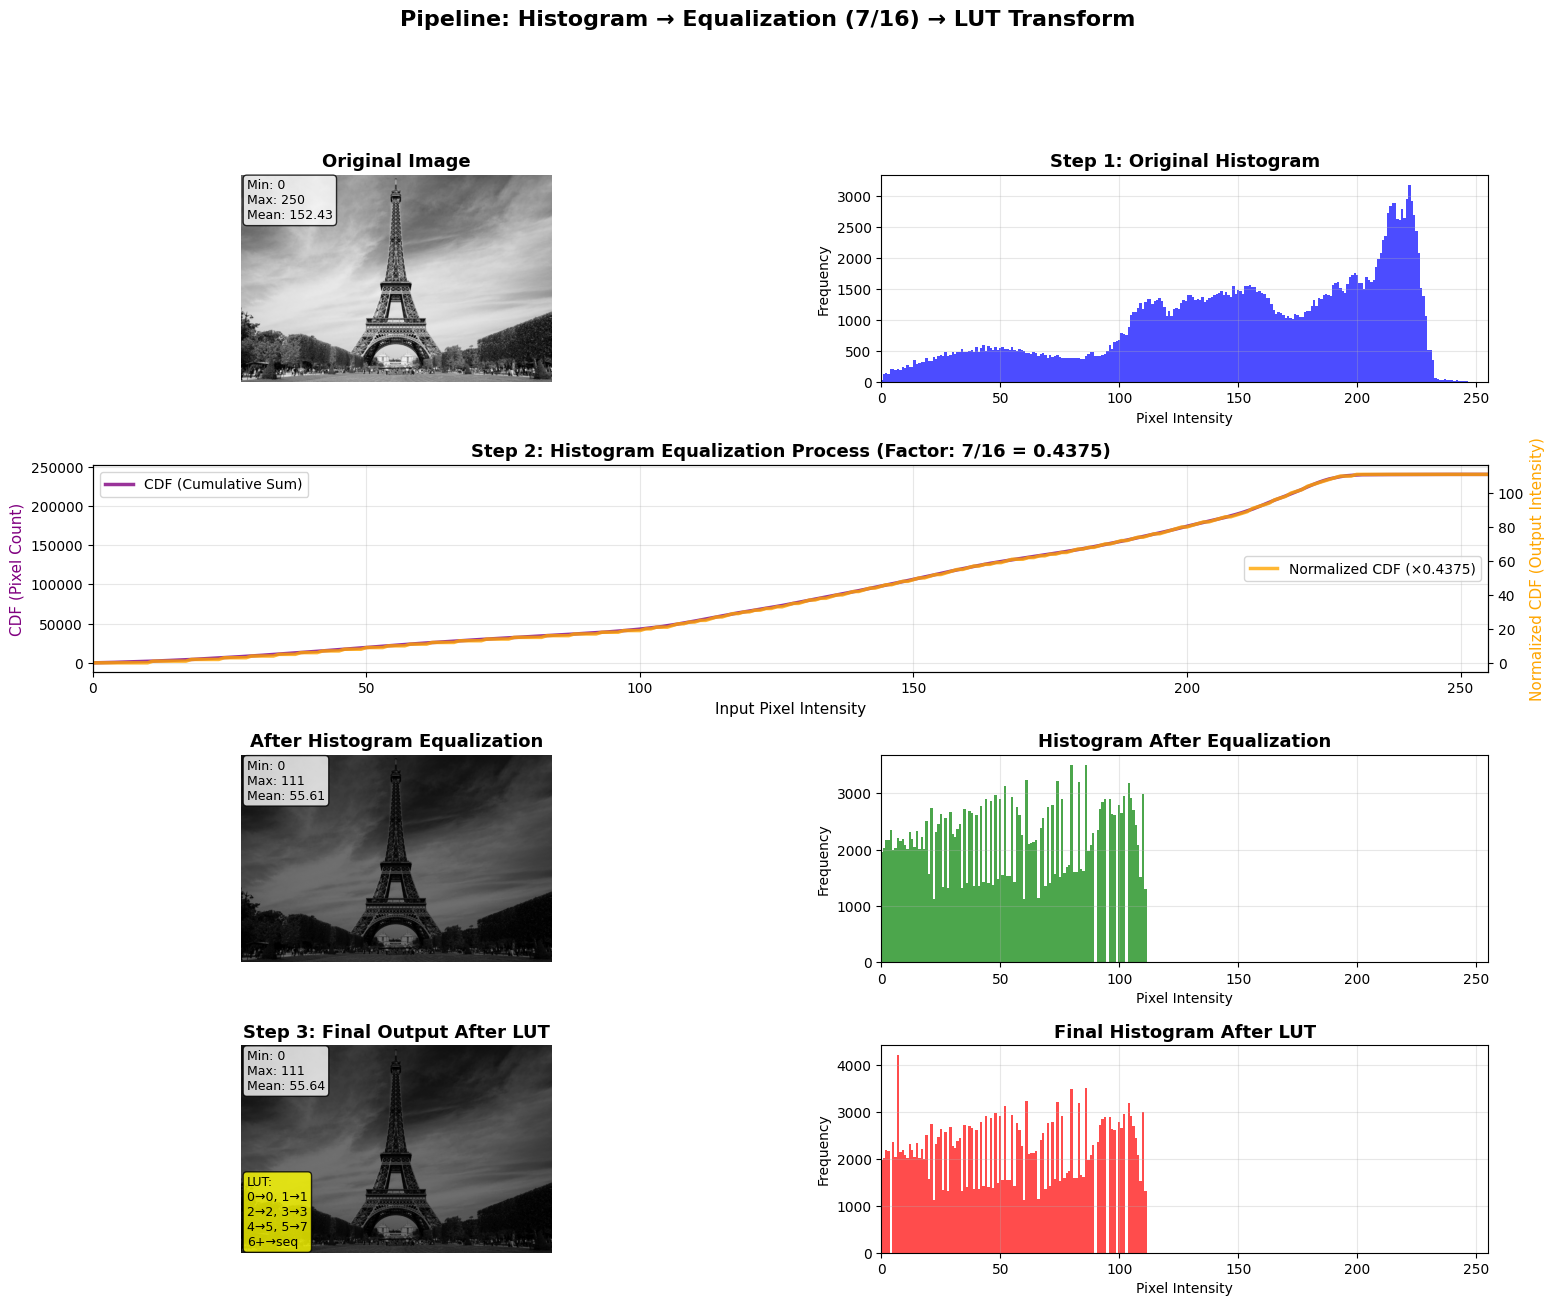


PROCESSING PIPELINE SUMMARY

1. Original Image:
   Range: [0, 250]
   Mean: 152.43, Std: 58.45

2. After Equalization (factor 7/16):
   Range: [0, 111]
   Mean: 55.61, Std: 32.32

3. After LUT Transform:
   Range: [0, 111]
   Mean: 55.64, Std: 32.28

Total pixels: 240000


In [ ]:

image_path = './img/eyfel.jpg'  
original_image = Image.open(image_path)

if original_image.mode != 'L':
    original_image = original_image.convert('L')


img_array = np.array(original_image, dtype=np.uint8)

hist, bins = np.histogram(img_array.flatten(), bins=256, range=(0, 256))

print("=" * 70)
print("STEP 1: COMPUTE HISTOGRAM")
print("=" * 70)
print(f"Total pixels: {img_array.size}")
print(f"Histogram computed for 256 intensity levels")
print(f"Sample histogram values: {hist[:10]}")

normalization_factor = 7 / 16


cdf = np.cumsum(hist)

total_pixels = img_array.size
cdf_normalized = (cdf / total_pixels) * normalization_factor * 255

cdf_normalized = np.clip(cdf_normalized, 0, 255).astype(np.uint8)

equalized_image = cdf_normalized[img_array]

print("\n" + "=" * 70)
print("STEP 2: HISTOGRAM EQUALIZATION WITH FACTOR 7/16")
print("=" * 70)
print(f"Normalization factor: 7/16 = {normalization_factor:.4f}")
print(f"CDF calculated and normalized")
print(f"Equalized image created")
print(f"Equalized range: [{np.min(equalized_image)}, {np.max(equalized_image)}]")


custom_lut = np.arange(256, dtype=np.uint8)

custom_lut[0] = 0
custom_lut[1] = 1
custom_lut[2] = 2
custom_lut[3] = 3
custom_lut[4] = 5
custom_lut[5] = 7

final_output = custom_lut[equalized_image]

print("\n" + "=" * 70)
print("STEP 3: IMAGE TRANSFORM USING LUT")
print("=" * 70)
print("LUT Mapping applied:")
print("  0 → 0")
print("  1 → 1")
print("  2 → 2")
print("  3 → 3")
print("  4 → 5")
print("  5 → 7")
print("  6+ → sequential")
print(f"Final output range: [{np.min(final_output)}, {np.max(final_output)}]")


hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
hist_final, _ = np.histogram(final_output.flatten(), bins=256, range=(0, 256))

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 2, hspace=0.4, wspace=0.3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img_array, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original Image', fontsize=13, fontweight='bold')
ax1.axis('off')
stats_orig = f'Min: {np.min(img_array)}\nMax: {np.max(img_array)}\nMean: {np.mean(img_array):.2f}'
ax1.text(0.02, 0.98, stats_orig, transform=ax1.transAxes, fontsize=9, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(range(256), hist, width=1.0, color='blue', alpha=0.7)
ax2.set_title('Step 1: Original Histogram', fontsize=13, fontweight='bold')
ax2.set_xlabel('Pixel Intensity', fontsize=10)
ax2.set_ylabel('Frequency', fontsize=10)
ax2.set_xlim([0, 255])
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(range(256), cdf, color='purple', linewidth=2.5, label='CDF (Cumulative Sum)', alpha=0.8)
ax3_twin = ax3.twinx()
ax3_twin.plot(range(256), cdf_normalized, color='orange', linewidth=2.5, 
              label=f'Normalized CDF (×{normalization_factor:.4f})', alpha=0.8)
ax3.set_title(f'Step 2: Histogram Equalization Process (Factor: 7/16 = {normalization_factor:.4f})', 
              fontsize=13, fontweight='bold')
ax3.set_xlabel('Input Pixel Intensity', fontsize=11)
ax3.set_ylabel('CDF (Pixel Count)', fontsize=11, color='purple')
ax3_twin.set_ylabel('Normalized CDF (Output Intensity)', fontsize=11, color='orange')
ax3.set_xlim([0, 255])
ax3.legend(loc='upper left', fontsize=10)
ax3_twin.legend(loc='center right', fontsize=10)
ax3.grid(True, alpha=0.3)


ax4 = fig.add_subplot(gs[2, 0])
ax4.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
ax4.set_title('After Histogram Equalization', fontsize=13, fontweight='bold')
ax4.axis('off')
stats_eq = f'Min: {np.min(equalized_image)}\nMax: {np.max(equalized_image)}\nMean: {np.mean(equalized_image):.2f}'
ax4.text(0.02, 0.98, stats_eq, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax5 = fig.add_subplot(gs[2, 1])
ax5.bar(range(256), hist_equalized, width=1.0, color='green', alpha=0.7)
ax5.set_title('Histogram After Equalization', fontsize=13, fontweight='bold')
ax5.set_xlabel('Pixel Intensity', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_xlim([0, 255])
ax5.grid(True, alpha=0.3)


ax6 = fig.add_subplot(gs[3, 0])
ax6.imshow(final_output, cmap='gray', vmin=0, vmax=255)
ax6.set_title('Step 3: Final Output After LUT', fontsize=13, fontweight='bold')
ax6.axis('off')
stats_final = f'Min: {np.min(final_output)}\nMax: {np.max(final_output)}\nMean: {np.mean(final_output):.2f}'
ax6.text(0.02, 0.98, stats_final, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

lut_text = "LUT:\n0→0, 1→1\n2→2, 3→3\n4→5, 5→7\n6+→seq"
ax6.text(0.02, 0.02, lut_text, transform=ax6.transAxes, fontsize=9,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

ax7 = fig.add_subplot(gs[3, 1])
ax7.bar(range(256), hist_final, width=1.0, color='red', alpha=0.7)
ax7.set_title('Final Histogram After LUT', fontsize=13, fontweight='bold')
ax7.set_xlabel('Pixel Intensity', fontsize=10)
ax7.set_ylabel('Frequency', fontsize=10)
ax7.set_xlim([0, 255])
ax7.grid(True, alpha=0.3)

plt.suptitle('Pipeline: Histogram → Equalization (7/16) → LUT Transform', 
             fontsize=16, fontweight='bold', y=0.998)
plt.show()


print("\n" + "=" * 70)
print("PROCESSING PIPELINE SUMMARY")
print("=" * 70)
print(f"\n1. Original Image:")
print(f"   Range: [{np.min(img_array)}, {np.max(img_array)}]")
print(f"   Mean: {np.mean(img_array):.2f}, Std: {np.std(img_array):.2f}")

print(f"\n2. After Equalization (factor 7/16):")
print(f"   Range: [{np.min(equalized_image)}, {np.max(equalized_image)}]")
print(f"   Mean: {np.mean(equalized_image):.2f}, Std: {np.std(equalized_image):.2f}")

print(f"\n3. After LUT Transform:")
print(f"   Range: [{np.min(final_output)}, {np.max(final_output)}]")
print(f"   Mean: {np.mean(final_output):.2f}, Std: {np.std(final_output):.2f}")

print(f"\nTotal pixels: {img_array.size}")

# **Histogram Equalization**
**RGB - Saturated Photo**

**Saturation increased by factor: 1.5**

**BOTTOM ROW: RGB Equalization - Saturated Photo**



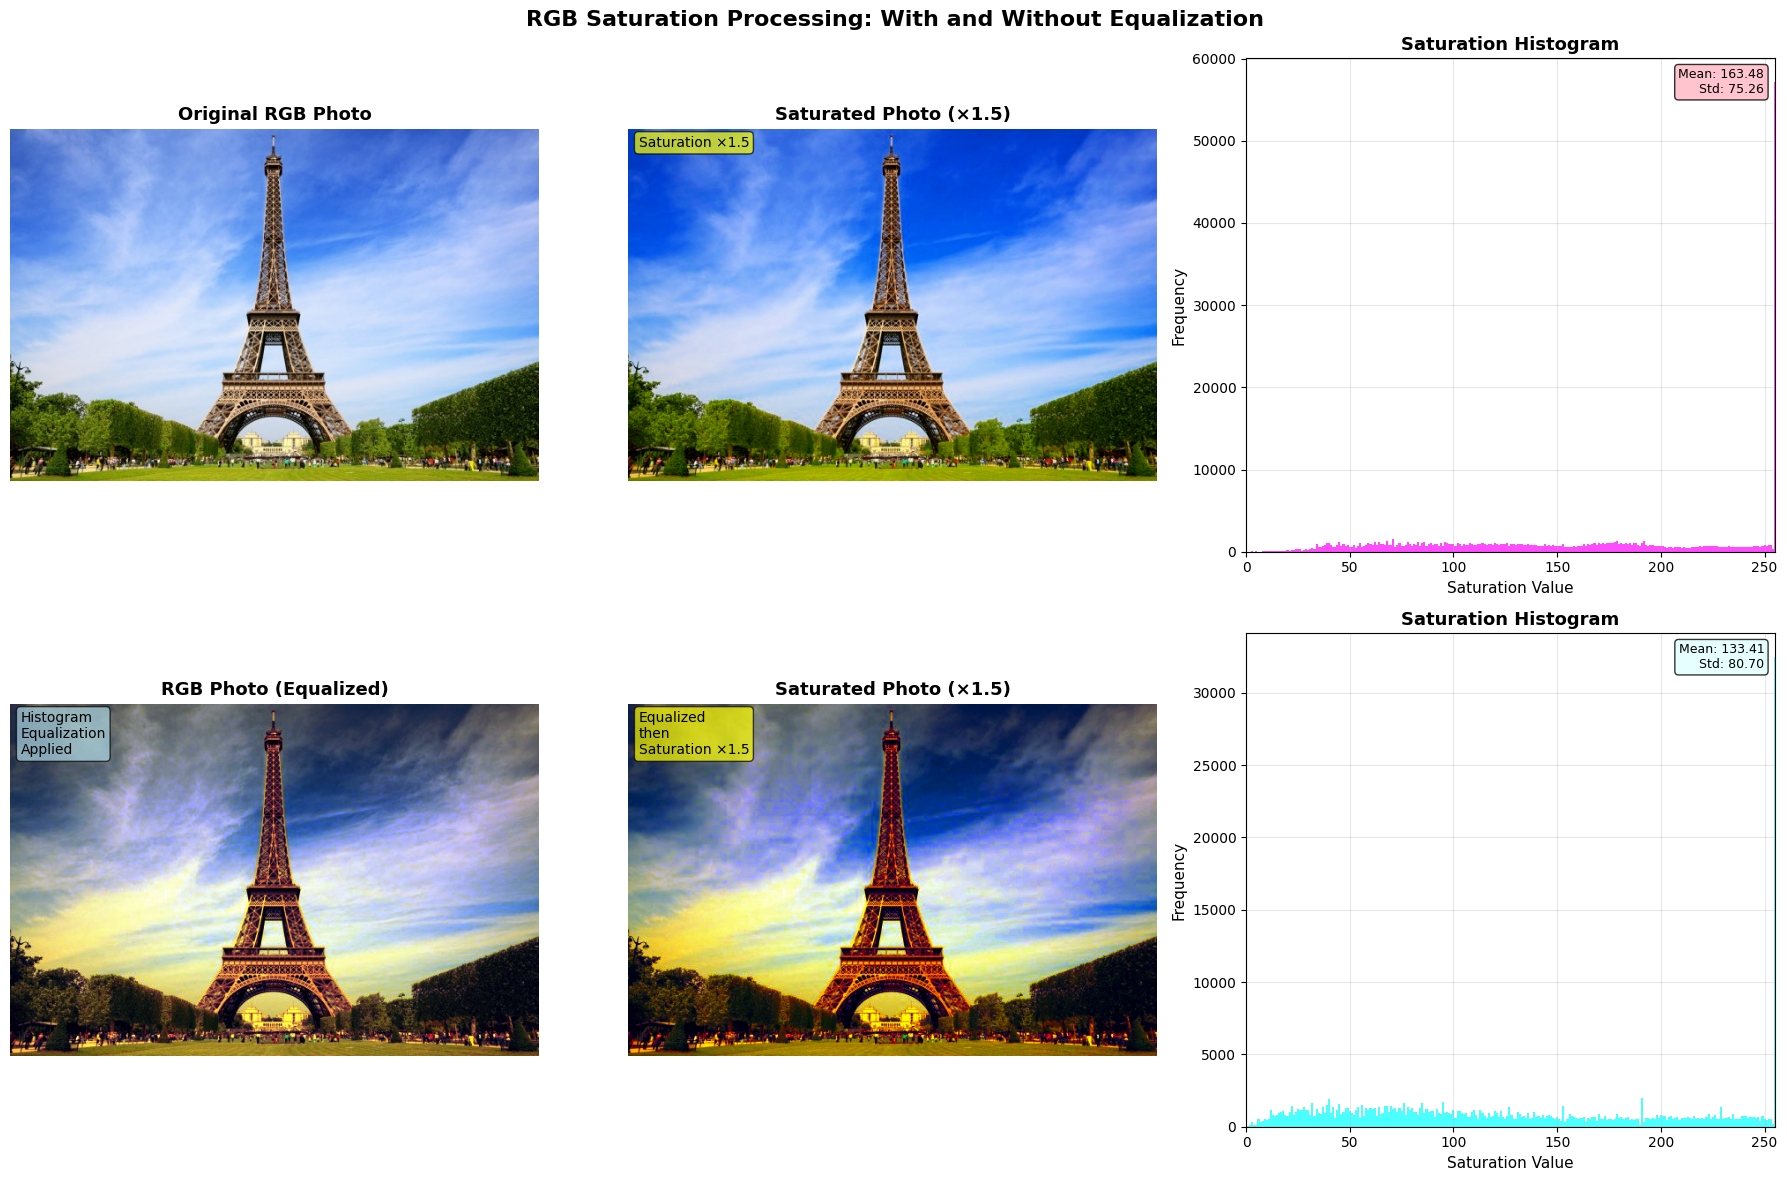


Image size: 600 x 400
Saturation factor: 1.5

Processing complete!


In [37]:

image_path = './img/eyfel.jpg'  
original_image = Image.open(image_path)


if original_image.mode != 'RGB':
    original_image = original_image.convert('RGB')

rgb_array = np.array(original_image)
height, width = rgb_array.shape[:2]

rgb_normalized = rgb_array / 255.0
hsv_array = np.zeros_like(rgb_normalized)
for i in range(height):
    for j in range(width):
        r, g, b = rgb_normalized[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_array[i, j] = [h, s, v]

saturation_factor = 1.5
hsv_saturated = hsv_array.copy()
hsv_saturated[:, :, 1] = np.clip(hsv_array[:, :, 1] * saturation_factor, 0, 1)

rgb_saturated = np.zeros_like(rgb_normalized)
for i in range(height):
    for j in range(width):
        h, s, v = hsv_saturated[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_saturated[i, j] = [r, g, b]

rgb_saturated = (rgb_saturated * 255).astype(np.uint8)

saturation_channel = (hsv_saturated[:, :, 1] * 255).astype(np.uint8)
hist_saturation, _ = np.histogram(saturation_channel.flatten(), bins=256, range=(0, 256))




rgb_equalized = np.zeros_like(rgb_array)
for channel in range(3):
    hist_ch, _ = np.histogram(rgb_array[:, :, channel].flatten(), bins=256, range=(0, 256))
    cdf_ch = np.cumsum(hist_ch)
    cdf_ch_normalized = (cdf_ch / cdf_ch[-1] * 255).astype(np.uint8)
    rgb_equalized[:, :, channel] = cdf_ch_normalized[rgb_array[:, :, channel]]

rgb_eq_normalized = rgb_equalized / 255.0
hsv_eq_array = np.zeros_like(rgb_eq_normalized)
for i in range(height):
    for j in range(width):
        r, g, b = rgb_eq_normalized[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        hsv_eq_array[i, j] = [h, s, v]

hsv_eq_saturated = hsv_eq_array.copy()
hsv_eq_saturated[:, :, 1] = np.clip(hsv_eq_array[:, :, 1] * saturation_factor, 0, 1)


rgb_eq_saturated = np.zeros_like(rgb_eq_normalized)
for i in range(height):
    for j in range(width):
        h, s, v = hsv_eq_saturated[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        rgb_eq_saturated[i, j] = [r, g, b]

rgb_eq_saturated = (rgb_eq_saturated * 255).astype(np.uint8)

saturation_eq_channel = (hsv_eq_saturated[:, :, 1] * 255).astype(np.uint8)
hist_saturation_eq, _ = np.histogram(saturation_eq_channel.flatten(), bins=256, range=(0, 256))


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('RGB Saturation Processing: With and Without Equalization', fontsize=16, fontweight='bold')

axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Original RGB Photo', fontsize=13, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(rgb_saturated)
axes[0, 1].set_title(f'Saturated Photo (×{saturation_factor})', fontsize=13, fontweight='bold')
axes[0, 1].axis('off')
sat_text = f'Saturation ×{saturation_factor}'
axes[0, 1].text(0.02, 0.98, sat_text, transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

axes[0, 2].bar(range(256), hist_saturation, width=1.0, color='magenta', alpha=0.7)
axes[0, 2].set_title('Saturation Histogram', fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel('Saturation Value', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
axes[0, 2].set_xlim([0, 255])
axes[0, 2].grid(True, alpha=0.3)
stats_sat = f'Mean: {np.mean(saturation_channel):.2f}\nStd: {np.std(saturation_channel):.2f}'
axes[0, 2].text(0.98, 0.98, stats_sat, transform=axes[0, 2].transAxes, fontsize=9,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))

axes[1, 0].imshow(rgb_equalized)
axes[1, 0].set_title('RGB Photo (Equalized)', fontsize=13, fontweight='bold')
axes[1, 0].axis('off')
eq_label = 'Histogram\nEqualization\nApplied'
axes[1, 0].text(0.02, 0.98, eq_label, transform=axes[1, 0].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

axes[1, 1].imshow(rgb_eq_saturated)
axes[1, 1].set_title(f'Saturated Photo (×{saturation_factor})', fontsize=13, fontweight='bold')
axes[1, 1].axis('off')
sat_eq_text = f'Equalized\nthen\nSaturation ×{saturation_factor}'
axes[1, 1].text(0.02, 0.98, sat_eq_text, transform=axes[1, 1].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

axes[1, 2].bar(range(256), hist_saturation_eq, width=1.0, color='cyan', alpha=0.7)
axes[1, 2].set_title('Saturation Histogram', fontsize=13, fontweight='bold')
axes[1, 2].set_xlabel('Saturation Value', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].set_xlim([0, 255])
axes[1, 2].grid(True, alpha=0.3)
stats_sat_eq = f'Mean: {np.mean(saturation_eq_channel):.2f}\nStd: {np.std(saturation_eq_channel):.2f}'
axes[1, 2].text(0.98, 0.98, stats_sat_eq, transform=axes[1, 2].transAxes, fontsize=9,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()


print(f"\nImage size: {width} x {height}")
print(f"Saturation factor: {saturation_factor}")
print("\nProcessing complete!")

# **Mean Shifting**

Number of clusters found: 3


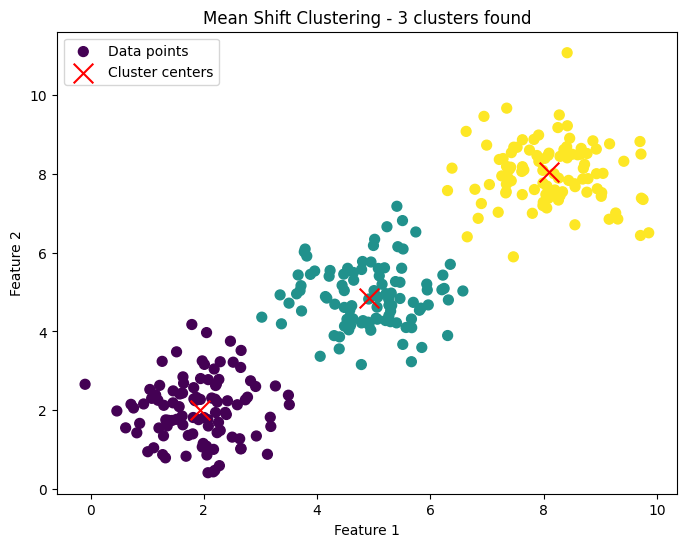

In [ ]:

centers = [[2, 2], [8, 8], [5, 5]]  
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.8, random_state=42)


mean_shift = MeanShift(bandwidth=2)  


mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_


n_clusters = len(np.unique(labels))
print(f'Number of clusters found: {n_clusters}')


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.title(f'Mean Shift Clustering - {n_clusters} clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Exception ignored on calling ctypes callback function <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f80a31c0b80>:
Traceback (most recent call last):
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
  File "/home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.13/ctypes/__init__.py", line 390, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/shaxzod/University/AI/AI_Porject/myenv/lib/python3.13/site-packages/numpy.libs/libscipy_openblas64_-8fb3d286.so: 

Number of clusters found: 3


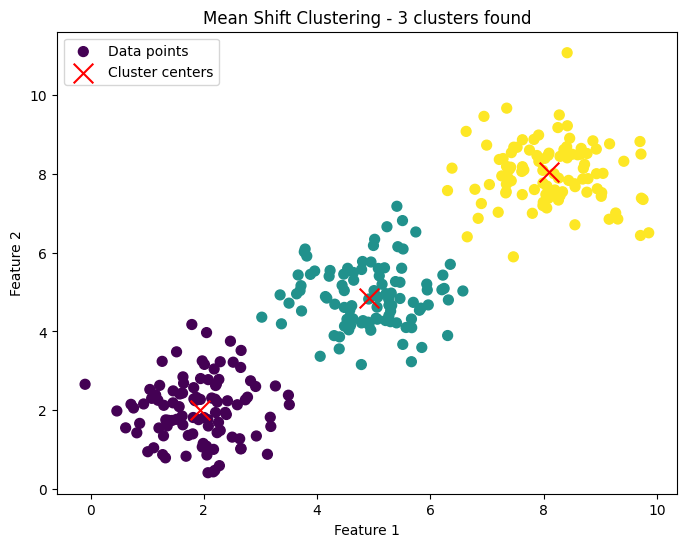

In [25]:


centers = [[2, 2], [8, 8], [5, 5]]  
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.8, random_state=42)

mean_shift = MeanShift(bandwidth=2)  

mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

n_clusters = len(np.unique(labels))
print(f'Number of clusters found: {n_clusters}')

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label='Data points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.title(f'Mean Shift Clustering - {n_clusters} clusters found')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:

bw = cv2.imread('./noise2.png', 0)
height, width = bw.shape[0:2]
cv2.imshow("Original BW", bw)

binary = np.zeros([height, width, 1], 'uint8')

thresh = 85

for row in range(0, height):
    for col in range(0, width):
        if bw[row][col] > thresh:
            binary[row][col] = 255

cv2.imshow("Slow Binary", binary)

cv2.waitKey(0)
cv2.destroyAllWindows()

# **Adaptive Thresholding**

In [ ]:


img = cv2.imread('./noise2.png', 0)
cv2.imshow("Original", img)


ret, thresh_basic = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)

thres_adapt = cv2.adaptiveThreshold(
    img, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,
    2
)
cv2.imshow("Adaptive Threshold", thres_adapt)

cv2.waitKey(0)
cv2.destroyAllWindows()

Running complete pipeline with K-means...
Step 1: Extracting orange color using K-means...
Step 2: Applying contrast enhancement and adaptive thresholding...
Step 3: Removing noise...


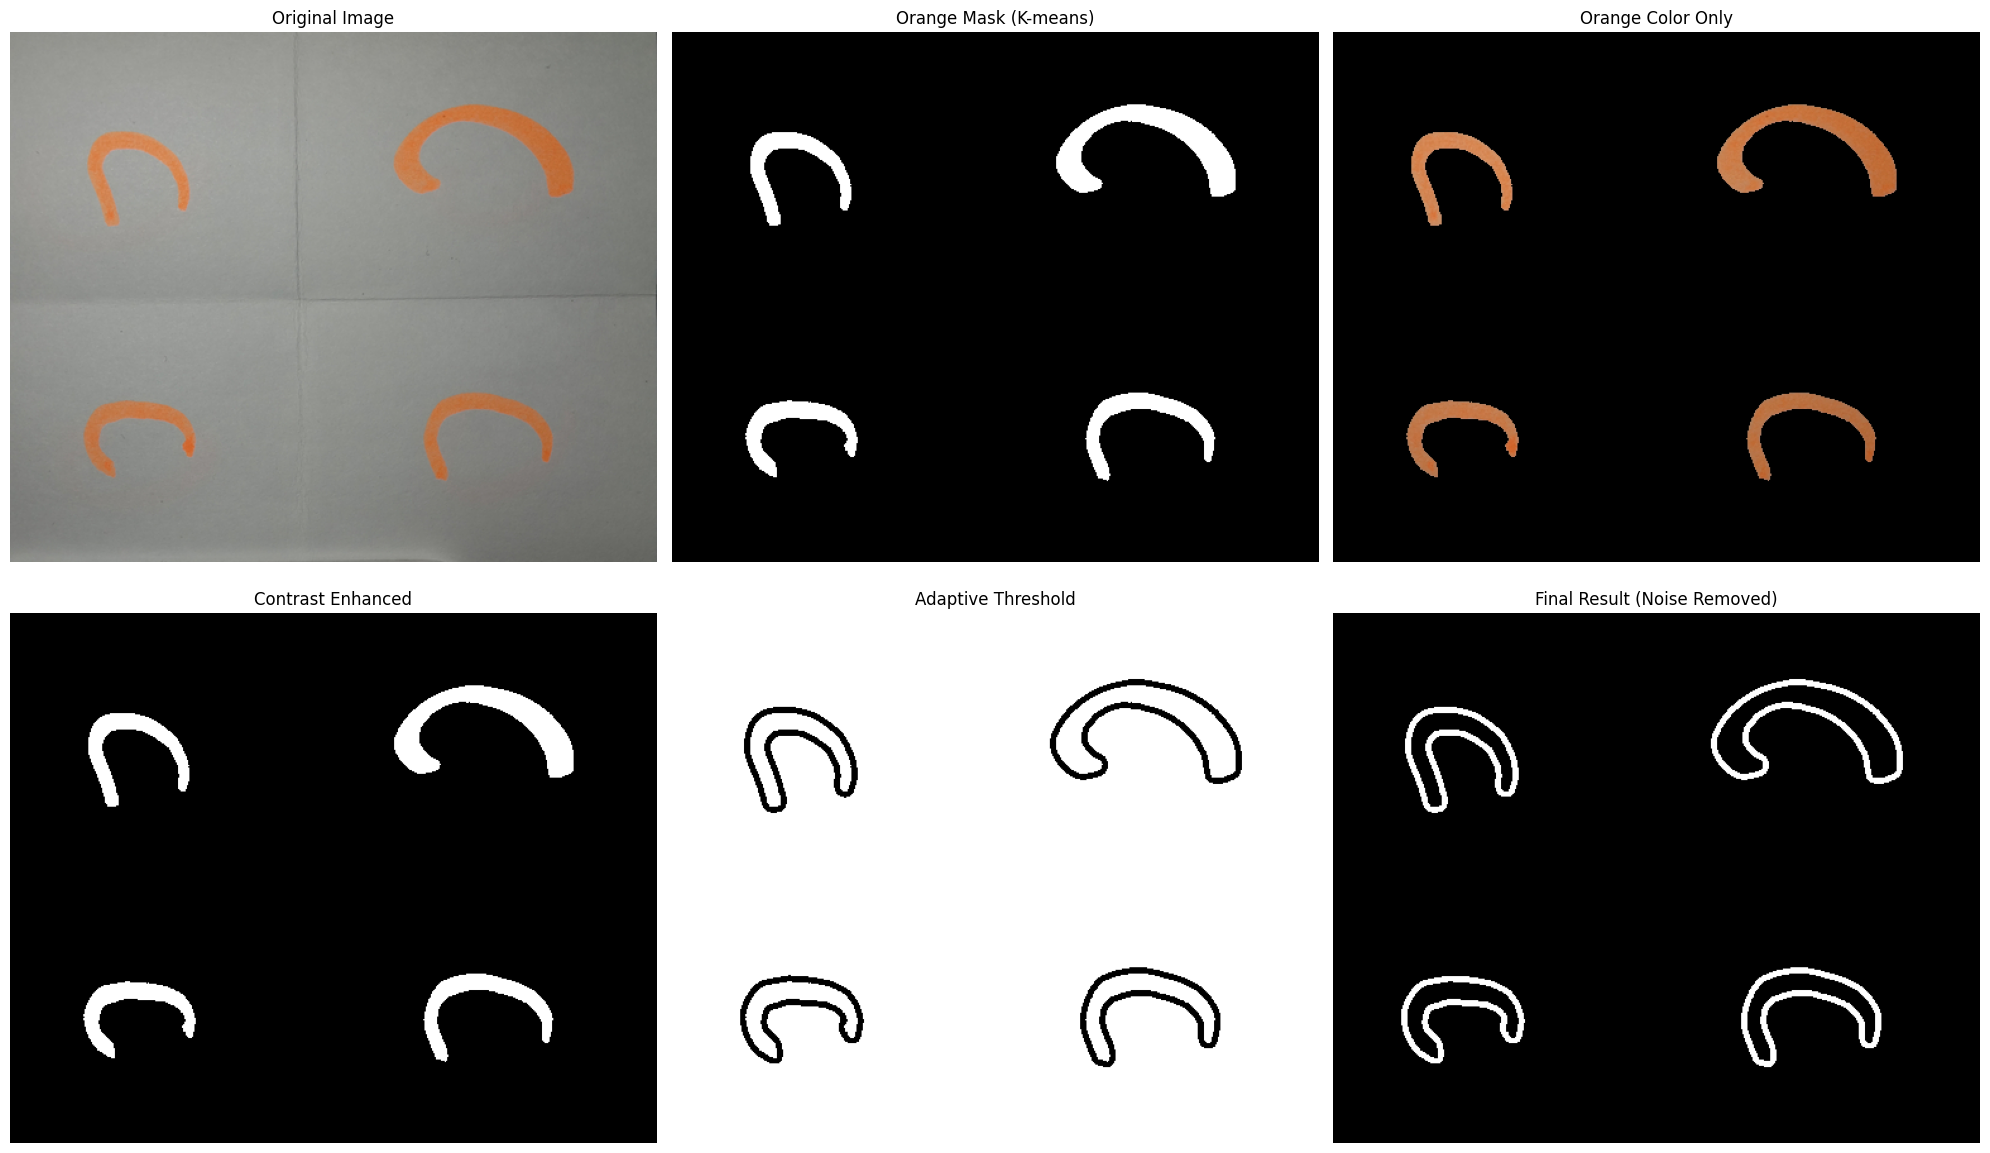


Running simplified HSV-based approach...


In [ ]:


def extract_orange_color_kmeans(image_path, n_clusters=3):
    """Extract orange color using K-means clustering"""
    # Read the image in BGR format
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape image to be a list of pixels
    pixels = image_rgb.reshape(-1, 3)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Find the cluster that represents orange color
    # Orange is typically high in red, medium in green, low in blue
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate "orangeness" score for each cluster
    orangeness_scores = []
    for center in cluster_centers:
        r, g, b = center
        # Orange has high red, medium green, low blue
        score = r - abs(g - 120) - b  # Adjust weights as needed
        orangeness_scores.append(score)
    
    # Select the most orange cluster
    orange_cluster = np.argmax(orangeness_scores)
    
    # Create mask for orange pixels
    labels = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])
    orange_mask = (labels == orange_cluster).astype(np.uint8) * 255
    
    # Apply mask to original image
    orange_only = cv2.bitwise_and(image_rgb, image_rgb, mask=orange_mask)
    
    return orange_mask, orange_only, image_rgb

def enhance_contrast_and_threshold(mask):
    """Enhance contrast and apply adaptive thresholding"""
    # Convert mask to grayscale if it's not already
    if len(mask.shape) == 3:
        mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    else:
        mask_gray = mask
    
    # Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced = clahe.apply(mask_gray)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        contrast_enhanced, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11, 
        2
    )
    
    return adaptive_thresh, contrast_enhanced

def remove_noise(binary_image):
    """Remove noise using morphological operations"""
    # Define kernel for morphological operations
    kernel = np.ones((3,3), np.uint8)
    
    # Apply opening (erosion followed by dilation) to remove small noise
    cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # Apply closing (dilation followed by erosion) to fill small holes
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
    
    # Optional: Remove small connected components
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(cleaned, connectivity=8)
    sizes = stats[1:, -1]
    nb_components = nb_components - 1
    
    # Minimum size of particles we want to keep (adjust based on your image)
    min_size = 50
    
    cleaned_final = np.zeros_like(cleaned)
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            cleaned_final[output == i + 1] = 255
    
    return cleaned_final

def complete_pipeline(image_path):
    """Complete pipeline for orange text extraction"""
    # Step 1: Extract orange color using K-means
    print("Step 1: Extracting orange color using K-means...")
    orange_mask, orange_only, original = extract_orange_color_kmeans(image_path)
    
    # Step 2: Enhance contrast and apply adaptive thresholding
    print("Step 2: Applying contrast enhancement and adaptive thresholding...")
    adaptive_thresh, contrast_enhanced = enhance_contrast_and_threshold(orange_mask)
    
    # Step 3: Remove noise
    print("Step 3: Removing noise...")
    final_result = remove_noise(adaptive_thresh)
    
    # Convert to black background with white text
    final_black_bg = cv2.bitwise_not(final_result)
    
    # Display results
    plt.figure(figsize=(20, 12))
    
    plt.subplot(2, 3, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(orange_mask, cmap='gray')
    plt.title('Orange Mask (K-means)')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(orange_only)
    plt.title('Orange Color Only')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(contrast_enhanced, cmap='gray')
    plt.title('Contrast Enhanced')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Threshold')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(final_black_bg, cmap='gray')
    plt.title('Final Result (Noise Removed)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return final_black_bg, orange_mask, adaptive_thresh

# Alternative simpler function using your existing code structure
def simple_orange_extraction(image_path):
    """Simplified version using color range detection"""
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define orange color range in HSV (more robust than RGB)
    # Adjust these values based on your specific orange color
    lower_orange = np.array([5, 100, 100])    # Lower bound for orange
    upper_orange = np.array([15, 255, 255])   # Upper bound for orange
    
    # Create mask for orange color
    orange_mask = cv2.inRange(image_hsv, lower_orange, upper_orange)
    
    # Apply mask
    orange_only = cv2.bitwise_and(image_rgb, image_rgb, mask=orange_mask)
    
    # Convert to grayscale for thresholding
    gray = cv2.cvtColor(orange_only, cv2.COLOR_RGB2GRAY)
    
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11, 
        2
    )
    
    # Remove noise
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)
    
    # Invert to get black background
    final_result = cv2.bitwise_not(cleaned)
    
    return final_result, orange_mask, adaptive_thresh

# Usage example:
if __name__ == "__main__":
    image_path = './noise2.png'  # Replace with your image path
    
    # Method 1: Complete pipeline with K-means
    print("Running complete pipeline with K-means...")
    final_result, orange_mask, adaptive_thresh = complete_pipeline(image_path)
    
    # Method 2: Simpler HSV-based approach (often more reliable for color detection)
    print("\nRunning simplified HSV-based approach...")
    final_simple, orange_mask_simple, adaptive_simple = simple_orange_extraction(image_path)
    
    # Display comparison
    cv2.imshow("K-means Result", final_result)
    cv2.imshow("HSV-based Result", final_simple)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

def extract_orange_kmeans(image_path, n_clusters=3):
    """Extract only orange parts using K-means and remove everything else with white background"""
    
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape image to be a list of pixels
    pixels = image_rgb.reshape(-1, 3)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pixels)
    
    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])
    
    # Find the most orange cluster
    # Orange typically has high red, medium green, low blue
    orangeness_scores = []
    for center in cluster_centers:
        r, g, b = center
        # Higher score means more orange-like
        score = r * 0.8 - g * 0.5 - b * 0.3
        orangeness_scores.append(score)
    
    orange_cluster_idx = np.argmax(orangeness_scores)
    
    # Create result image with white background
    result = np.ones_like(image_rgb) * 255  # White background
    
    # Copy only orange pixels from original image
    orange_mask = labels == orange_cluster_idx
    result[orange_mask] = image_rgb[orange_mask]
    
    return result, orange_mask

# Usage
image_path = './noise2.png'  # Your image path

# Extract orange parts
orange_only_image, mask = extract_orange_kmeans(image_path)

# Display results
cv2.imshow("Original", cv2.imread(image_path))
cv2.imshow("Orange Only (White Background)", cv2.cvtColor(orange_only_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the result if needed
cv2.imwrite('orange_only_white_bg.png', cv2.cvtColor(orange_only_image, cv2.COLOR_RGB2BGR))

True

In [ ]:

image = cv2.imread('./noise2.png')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Method 1: Using color thresholding (recommended for specific color conversion)
def convert_orange_to_black_threshold(image):
    # Convert to HSV color space for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define range for orange color in HSV
    # Orange hue is typically between 5-20 in OpenCV HSV (0-180 range)
    lower_orange1 = np.array([5, 100, 100])
    upper_orange1 = np.array([15, 255, 255])
    
    # Create mask for orange color
    mask = cv2.inRange(hsv, lower_orange1, upper_orange1)
    
    # Convert orange pixels to black in the original image
    result = image.copy()
    result[mask > 0] = [0, 0, 0]  # Set to black in BGR
    
    return result

result_image = convert_orange_to_black_threshold(image)

# Save the result
cv2.imwrite('output.png', result_image)

print("Image processed successfully! Orange color converted to black.")

Image processed successfully! Orange color converted to black.


## Adaptive Thresholdding

In [ ]:

img = cv2.imread('./output.png', 0)
cv2.imshow("Original", img)

ret, thresh_basic = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)


thres_adapt = cv2.adaptiveThreshold(
    img, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    11,
    2
)
cv2.imshow("Adaptive Threshold", thres_adapt)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2

# Read the image in grayscale
img = cv2.imread('./output.png', 0)
cv2.imshow("Original", img)

# Apply basic binary threshold
ret, thresh_basic = cv2.threshold(img, 70, 255, cv2.THRESH_BINARY)
cv2.imshow("Basic Binary", thresh_basic)

cv2.waitKey(0)
cv2.destroyAllWindows()